# Natural language processing

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории. 

In [47]:
comments = pd.read_csv('../datasets/toxic.csv', index_col='id')

print('comments.shape:', comments.shape)

#comments = comments1[:160].copy()

# сумма по строке равна 0, то это не токсичный комментарий, иначе - токсичный
comments.loc[:, 'is toxic'] = comments.sum(axis=1)
comments['not toxic'] = np.where(comments['is toxic'] == 0, 1, 0)

# удаляем, т.к. он уже не нужен
del comments['is toxic']

# выводим один токсичный комментарий и один нетоксичный
comments.loc[['000103f0d9cfb60f', '0002bcb3da6cb337']]

comments.shape: (159571, 7)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not toxic
id,,,,,,,,
000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,1
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0


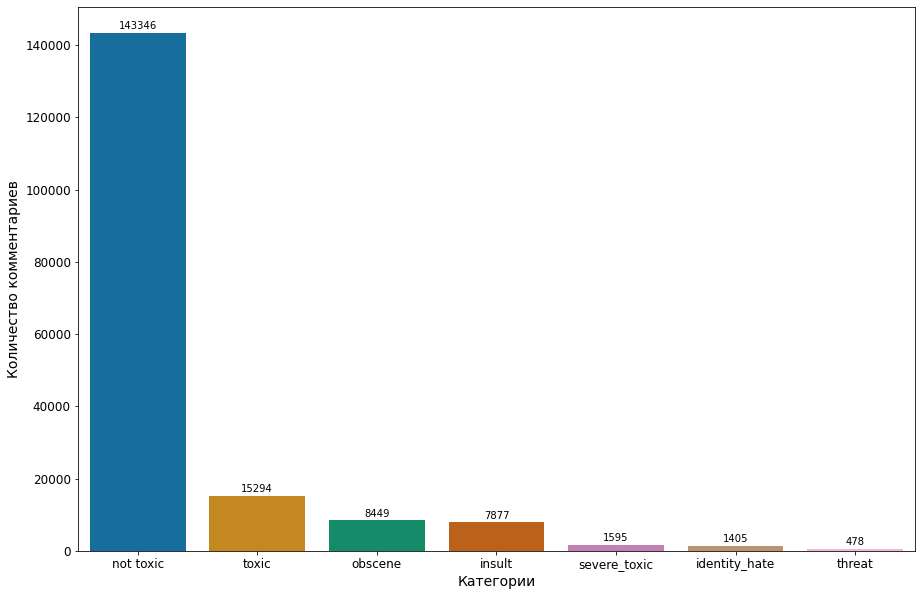

In [48]:
# функция для добавления меток
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1000, y[i], ha = 'center')

# датафрейм для диаграммы
diag = comments.sum(axis=0, numeric_only=True).sort_values(ascending=False)
diag = pd.DataFrame(diag, columns=['cnt']).reset_index()
diag = diag.rename({'index':'type'}, axis=1)

# построение графика
plt.figure(figsize=(15, 10))

_ = sns.barplot(data=diag, x='type', y='cnt', palette='colorblind')
addlabels(diag['type'], diag['cnt'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Категории', fontsize=14)
_ = plt.ylabel('Количество комментариев', fontsize=14)

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [49]:
import nltk
#nltk.download('all')

In [50]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [51]:
# функция очистки комментария
def DelSymbols(comment):
    comment = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',comment)
    comment = re.sub('@[^\s]+','',comment)
    comment = re.sub('[\s]+', ' ', comment)
    comment = re.sub('\[\d+\]+', ' ', comment)
    comment = re.sub(r'#([^\s]+)', r'\1', comment)
    comment = re.sub(r'[\!:\?\-\'\"\\/]', r'', comment)
    comment = comment.strip('\'"')
    return comment

In [52]:
# функция токенизации и лемматизации
def CleanTokenizeLemmatize(comment):
    lemmatizer = WordNetLemmatizer()
#    comment = DelSymbols(comment)
    comment = nltk.word_tokenize(comment)
    words = [lemmatizer.lemmatize(word) for word in comment if word not in stop_words and word.isalpha()]
#    words = DelSymbols(words)
#    words = [word for word in words if word in eng_words]
    return ' '.join(words)

In [53]:
# снятие ограничения на длину строки
pd.set_option('display.max_colwidth', None)

import timeit
tic = timeit.default_timer()

# перевод в нижний регистр
comments['lower_comment_text'] = comments['comment_text'].str.lower()

# токенизация и лемматизация
stop_words = set(stopwords.words('english'))
eng_words = set(nltk.corpus.words.words())

comments['tok_lemm_comments'] = comments['lower_comment_text'].apply(CleanTokenizeLemmatize)

toc = timeit.default_timer()
print('Длительность выполнения в минутах:', (toc - tic) / 60)
print('Длительность выполнения в секундах:', toc - tic)
comments[['comment_text', 'lower_comment_text', 'tok_lemm_comments']].loc[['000103f0d9cfb60f', '0002bcb3da6cb337']]

Длительность выполнения в минутах: 5.950392786666672
Длительность выполнения в секундах: 357.02356720000034


,comment_text,lower_comment_text,tok_lemm_comments
id,,,
000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",match background colour seemingly stuck thanks talk january utc
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker before you piss around on my work,cocksucker piss around work


In [54]:
print('Количество токенов для комментария с индексом 000103f0d9cfb60f:', 
      comments['tok_lemm_comments'].loc['000103f0d9cfb60f'].count(' ') + 1)

Количество токенов для комментария с индексом 000103f0d9cfb60f: 9


In [60]:
# установка ограничения на длину строки
pd.set_option('display.max_colwidth', 100)
del comments['lower_comment_text']
comments.loc[['000103f0d9cfb60f', '0002bcb3da6cb337']]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not toxic,tok_lemm_comments
id,,,,,,,,,
000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,0,0,0,0,0,1,match background colour seemingly stuck thanks talk january utc
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0,cocksucker piss around work


## Task 3

Раздели выборку на тренировочную и тестовую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

In [61]:
from sklearn.model_selection import train_test_split

X = comments['tok_lemm_comments'].copy()
y = comments.drop(labels=['tok_lemm_comments', 'comment_text'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111699,)
(47872,)
(111699, 7)
(47872, 7)


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print('Размерность тренировочной выборки:', X_train_tfidf.shape)

Размерность тренировочной выборки: (111699, 3000)


## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [64]:
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# классификация
model = OneVsRestClassifier(RidgeClassifier())

model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# рассчитываем ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.6728433325360061


## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

### Четыре дополнительных признака
* Доля уникальных слов в комментарии
* Количество повторяющихся слов
* Количество восклицательных знаков
* Доля ругательств

In [65]:
# создание дополнительных признаков
# доля уникальных слов в комментарии
unique_words_ratio_train = X_train.apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))
unique_words_ratio_test = X_test.apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))

# количество повторяющихся слов
repeated_words_count_train = X_train.apply(lambda x: len(x.split()) - len(set(x.split())))
repeated_words_count_test = X_test.apply(lambda x: len(x.split()) - len(set(x.split())))

# количество восклицательных знаков
exclamation_marks_count_train = comments.loc[X_train.index]['comment_text'].apply(lambda x: x.count('!'))
exclamation_marks_count_test = comments.loc[X_test.index]['comment_text'].apply(lambda x: x.count('!'))

# доля ругательств
censored_words = set(['fuck', 'stupid', 'cocksucker', 'piss', 'fool'])
censored_words_ratio_train = comments.loc[X_train.index]['comment_text'].apply(lambda x: 
                                                      len(set(x.lower().split()).intersection(censored_words)) / 
                                                      len(set(x.lower().split())))
censored_words_ratio_test = comments.loc[X_test.index]['comment_text'].apply(lambda x: 
                                                      len(set(x.lower().split()).intersection(censored_words)) / 
                                                      len(set(x.lower().split())))

In [66]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

# объединение новых признаков с с признаками TF-IDF
additional_features_train = csr_matrix(np.array([unique_words_ratio_train, repeated_words_count_train, 
                                                 exclamation_marks_count_train, censored_words_ratio_train]).T)
additional_features_test = csr_matrix(np.array([unique_words_ratio_test, repeated_words_count_test, 
                                                exclamation_marks_count_test, censored_words_ratio_test]).T)
X_train_tfidf_combined = hstack((X_train_tfidf, additional_features_train))
X_test_tfidf_combined = hstack((X_test_tfidf, additional_features_test))

In [67]:
# классификация
model_combined = OneVsRestClassifier(RidgeClassifier())

model_combined.fit(X_train_tfidf_combined, y_train)
y_pred = model_combined.predict(X_test_tfidf_combined)

# рассчитываем ROC-AUC
roc_auc_combined = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc_combined)

ROC-AUC: 0.6728417676641225


In [68]:
print('Классификация улучшилась на {:.2%}'.format(roc_auc_combined / roc_auc - 1))

Классификация улучшилась на -0.00%
